In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
def wrangle_cc():
    '''
    This function reads in card_transdata data from Kaggle, writes data to
    a csv file if a local file does not exist, and returns a df
    '''
    filename = 'card_transdata.csv'
    if os.path.isfile(filename):
        df = pd.read_csv(filename)
        
    return df

In [4]:
df = wrangle_cc()
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [5]:
def overview(df):
    '''
    print shape of DataFrame, .info, and .describe
    parameters: single pandas dataframe, df
    return: none
    '''
    print('--- Shape: {}'.format(df.shape))
    print('____________________________________________________')
    print('--- Info')
    df.info()
    print('____________________________________________________')
    print('--- Column Descriptions')
    print()
    print(df.describe())

In [6]:
overview(df)

--- Shape: (1000000, 8)
____________________________________________________
--- Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB
____________________________________________________
--- Column Descriptions

       distance_from_home  distance_from_last_transact

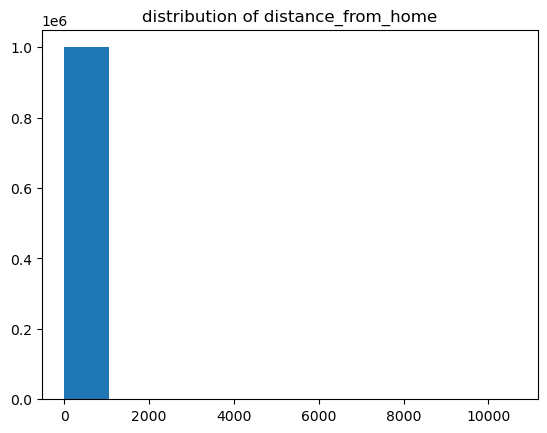

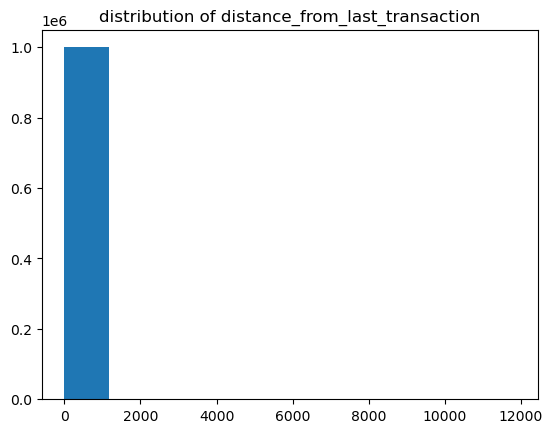

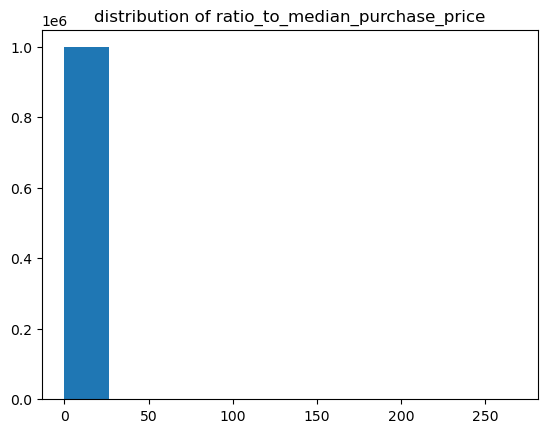

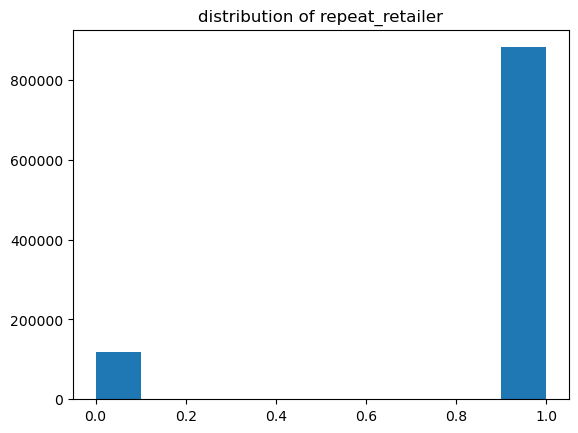

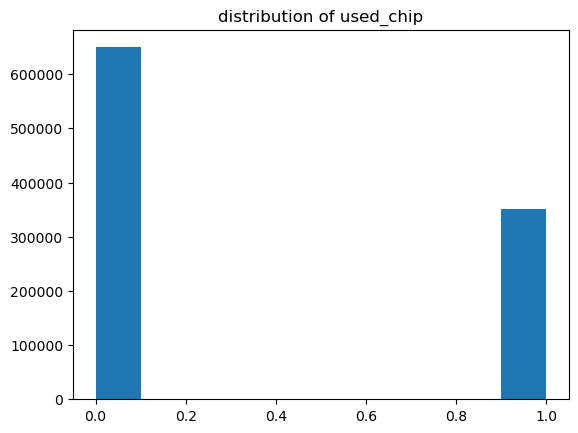

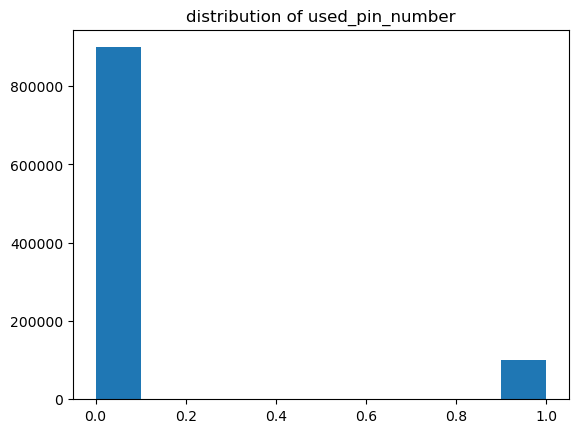

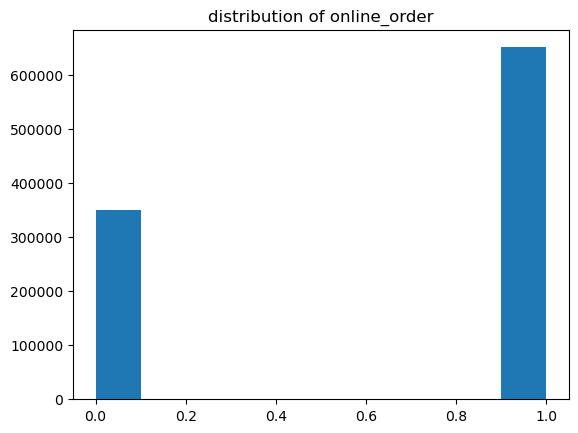

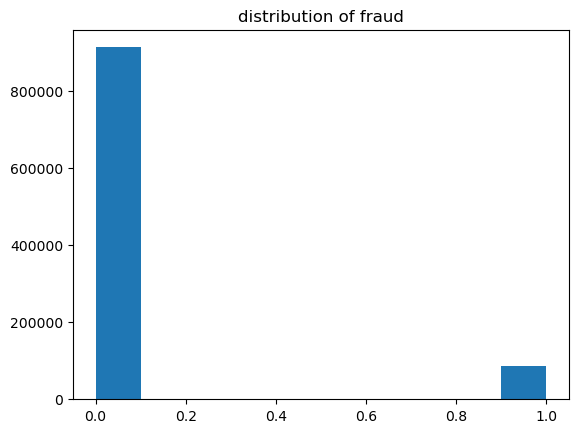

In [7]:
num_cols = list(df.select_dtypes(exclude=object).columns.values)

for col in num_cols:
    
    plt.hist(df[col])
    plt.title(f'distribution of {col}')
    plt.show()

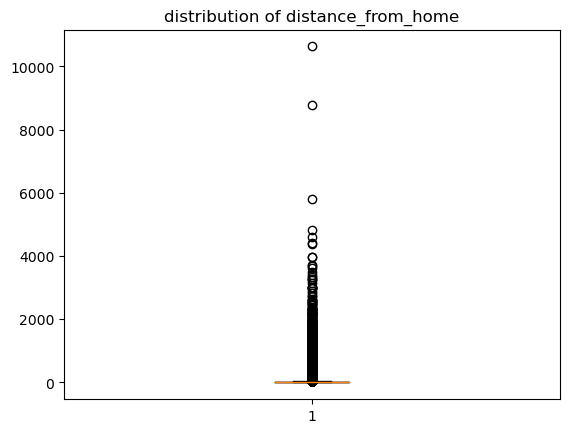

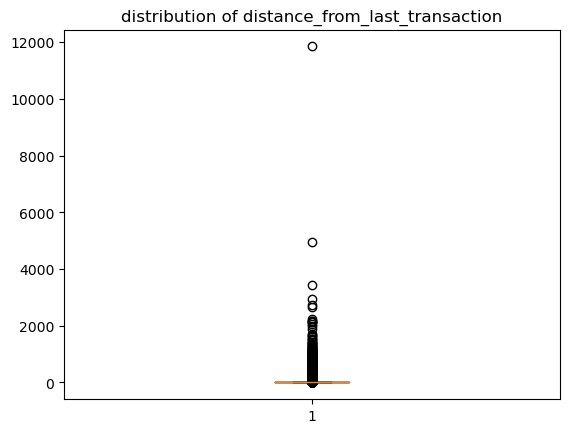

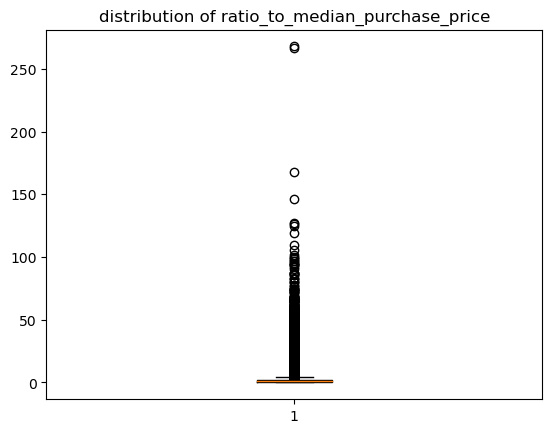

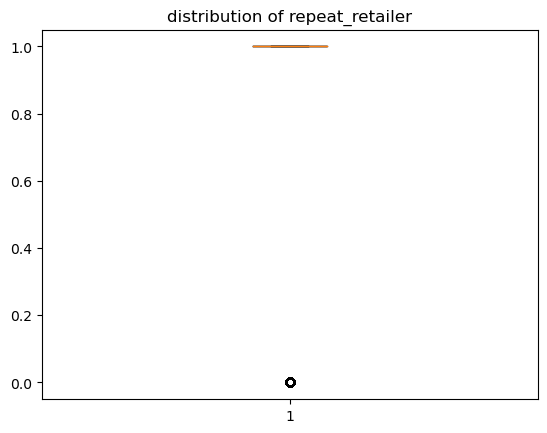

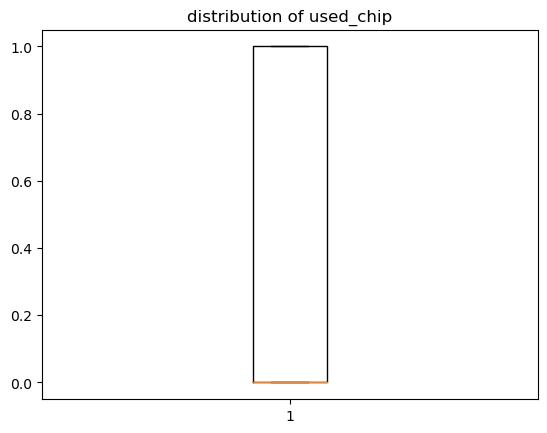

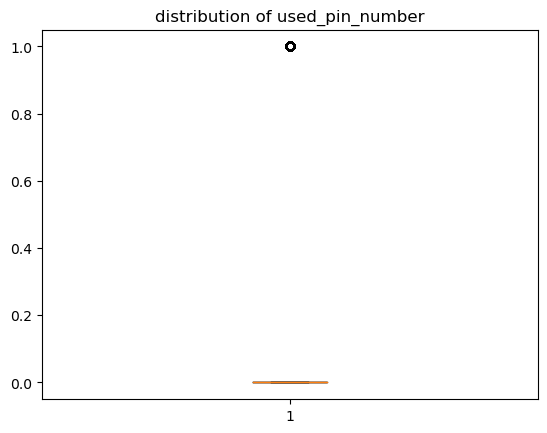

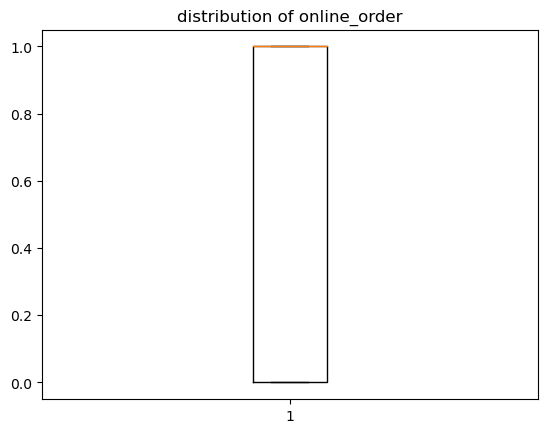

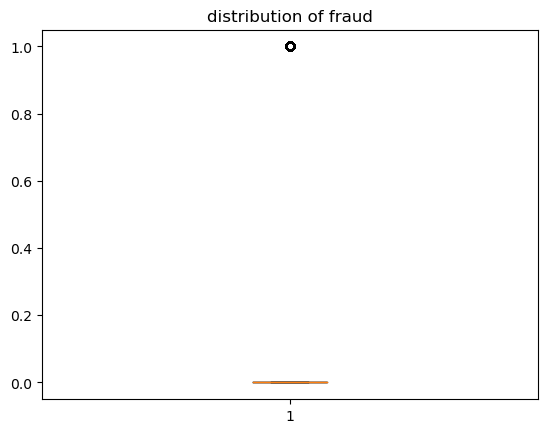

In [8]:
num_cols = list(df.select_dtypes(exclude=object).columns.values)

for col in num_cols:
    
    plt.boxplot(df[col])
    plt.title(f'distribution of {col}')
    plt.show()

In [ ]:
def prep_cc(df):
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        k=1.5
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        df = df[(wines[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [9]:
def split_data(df, target):
    '''
    This function take in a dataframe performs a train, validate, test split
    Returns train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test
    and prints out the shape of train, validate, test
    '''
    
    #create train_validate and test datasets
    train, test = train_test_split(df, train_size = 0.8, random_state = 123)
    #create train and validate datasets
    train, validate = train_test_split(train, train_size = 0.7, random_state = 123)

    #Split into X and y
    X_train = train.drop(columns=[target])
    y_train = train[target]

    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]

    X_test = test.drop(columns=[target])
    y_test = test[target]

    # Have function print datasets shape
    print(f'train -> {train.shape}')
    print(f'validate -> {validate.shape}')
    print(f'test -> {test.shape}')
   
    return train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test

In [10]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = split_data(df, 
                                                                                  'fraud')

train -> (560000, 8)
validate -> (240000, 8)
test -> (200000, 8)


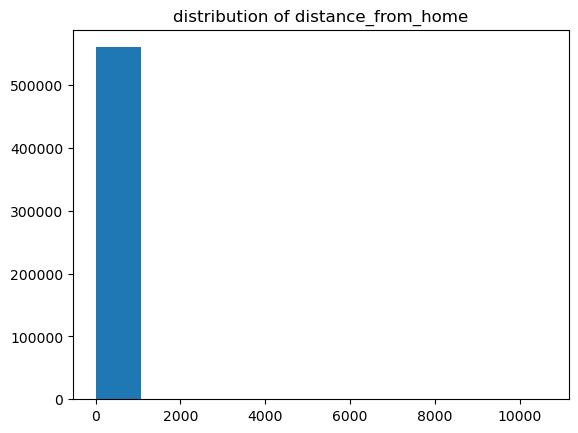

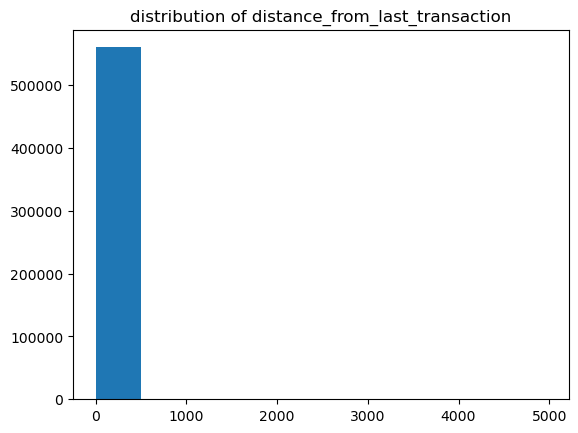

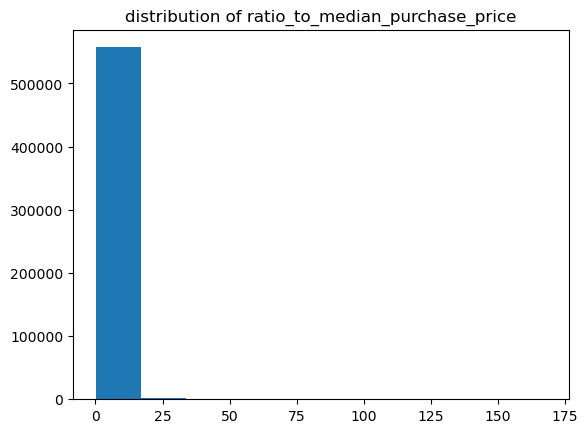

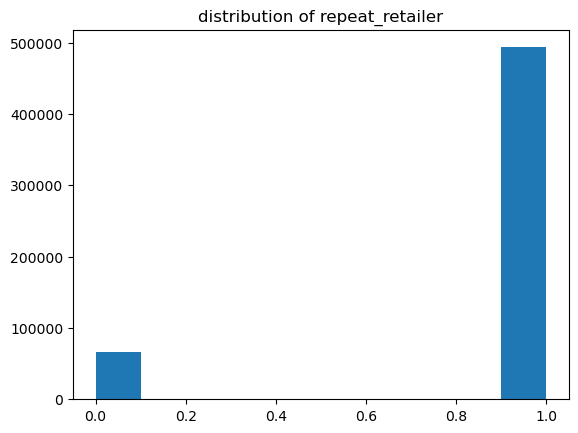

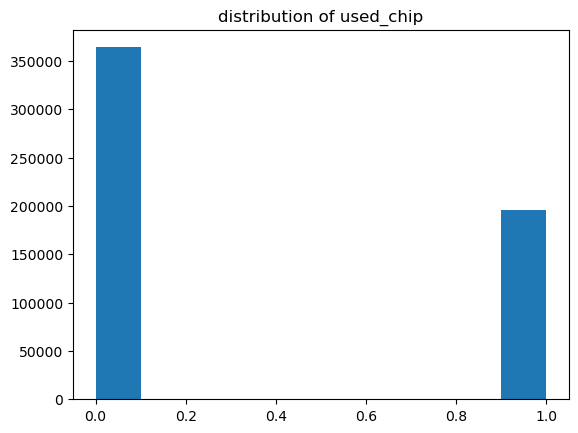

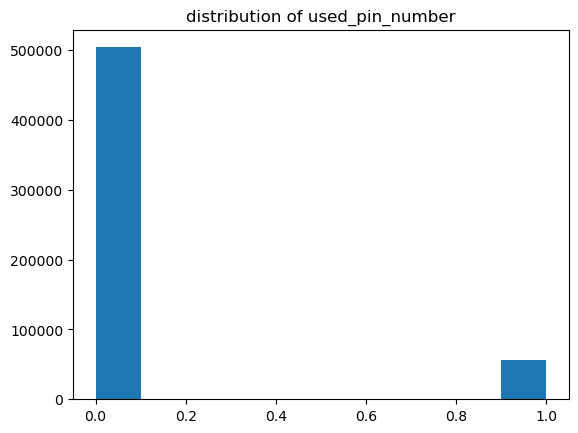

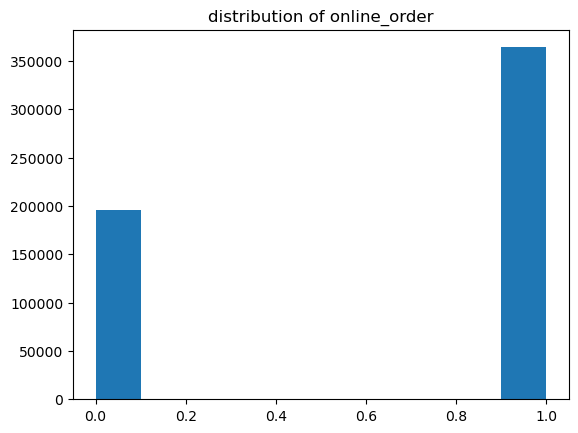

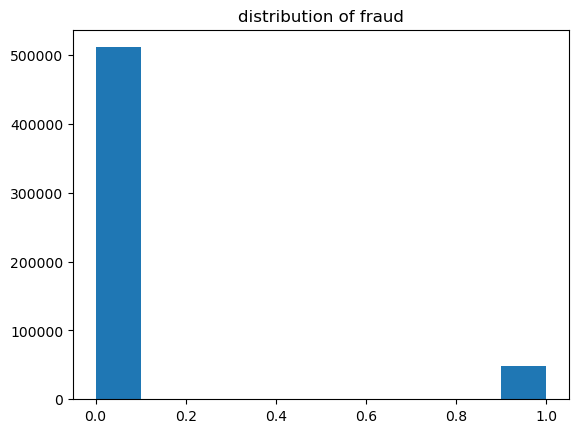

In [12]:
num_cols = list(train.select_dtypes(exclude=object).columns.values)

for col in num_cols:
    
    plt.hist(train[col])
    plt.title(f'distribution of {col}')
    plt.show()

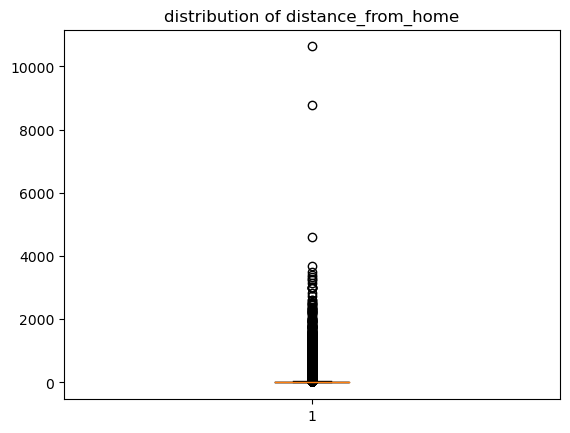

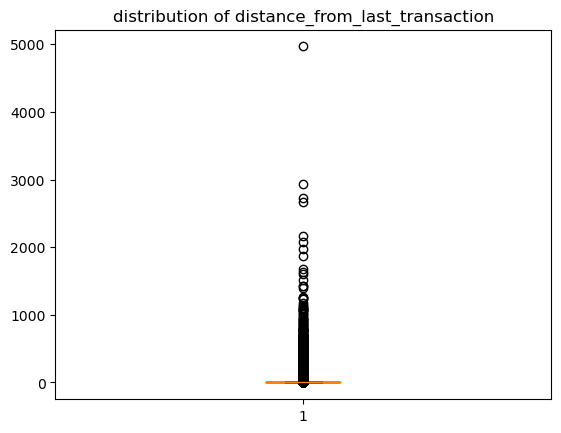

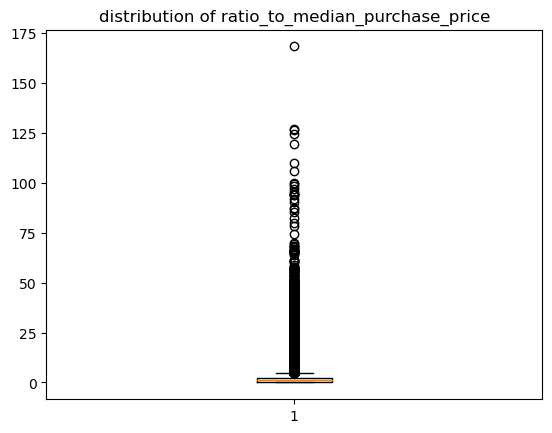

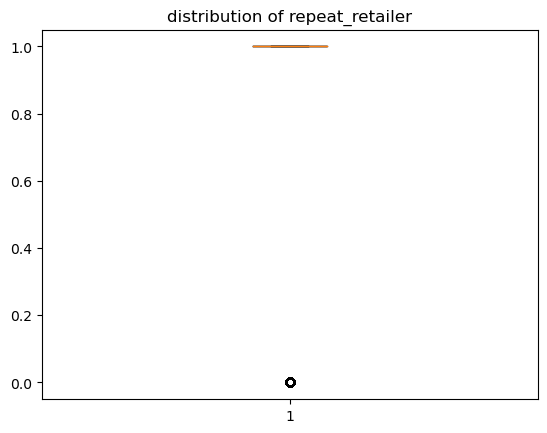

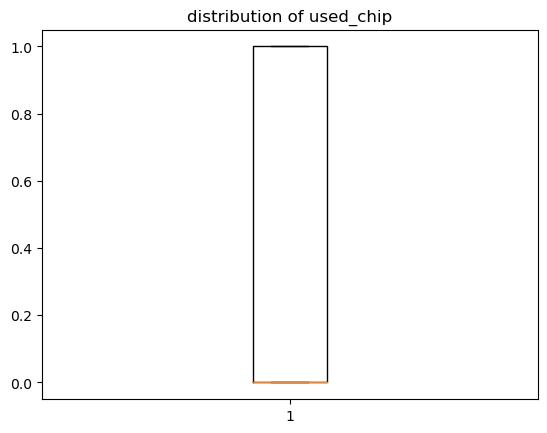

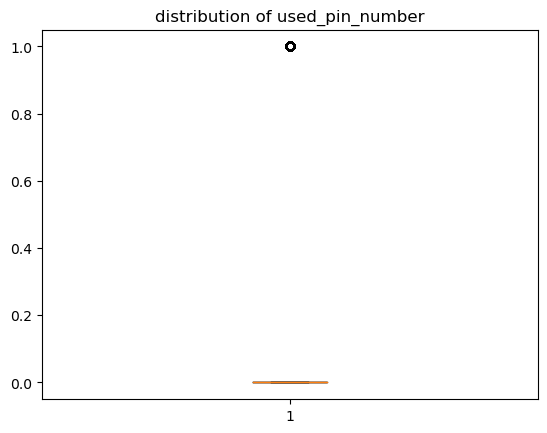

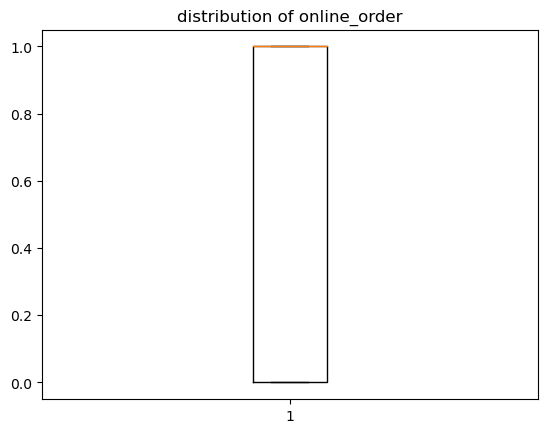

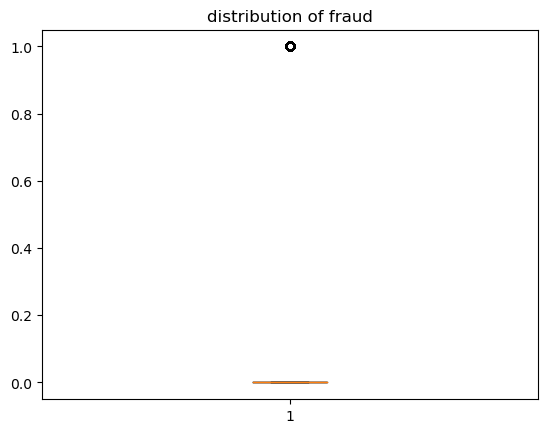

In [13]:
num_cols = list(train.select_dtypes(exclude=object).columns.values)

for col in num_cols:
    
    plt.boxplot(train[col])
    plt.title(f'distribution of {col}')
    plt.show()

In [14]:
train_corr = train.corr()
train_corr

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,-0.000180,0.000300,0.141424,-0.000952,-0.001607,-0.000301,0.187881
distance_from_last_transaction,-0.000180,1.000000,0.002557,-0.001129,0.001520,-0.000758,0.000405,0.104075
ratio_to_median_purchase_price,0.000300,0.002557,1.000000,0.001817,0.000796,0.001633,-0.002447,0.461966
repeat_retailer,0.141424,-0.001129,0.001817,1.000000,-0.000715,-0.000245,-0.000520,-0.001315
used_chip,-0.000952,0.001520,0.000796,-0.000715,1.000000,-0.001824,-0.000078,-0.061116
used_pin_number,-0.001607,-0.000758,0.001633,-0.000245,-0.001824,1.000000,0.001224,-0.099940
online_order,-0.000301,0.000405,-0.002447,-0.000520,-0.000078,0.001224,1.000000,0.191361
fraud,0.187881,0.104075,0.461966,-0.001315,-0.061116,-0.099940,0.191361,1.000000


<AxesSubplot:>

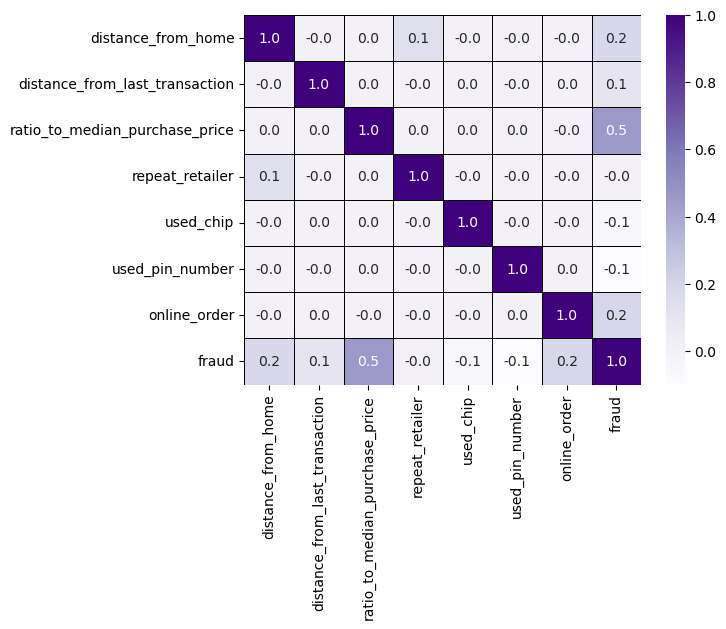

In [17]:
sns.heatmap(train_corr, cmap='Purples', linewidth=0.5, linecolor='black', annot=True, fmt=".1f")

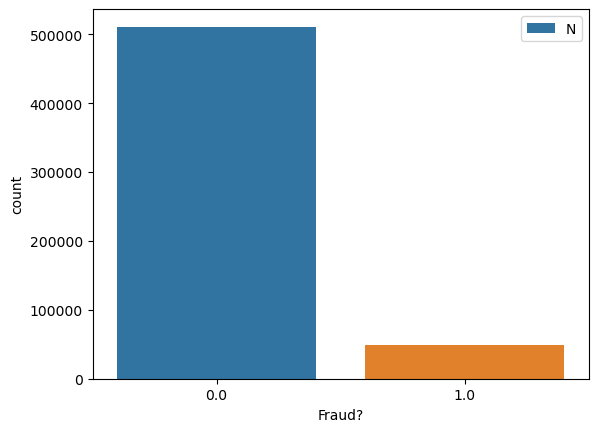

In [41]:
sns.countplot(data = train, x ='fraud')
plt.xlabel('Fraud?')
plt.legend('NY')

<AxesSubplot:xlabel='online_order', ylabel='count'>

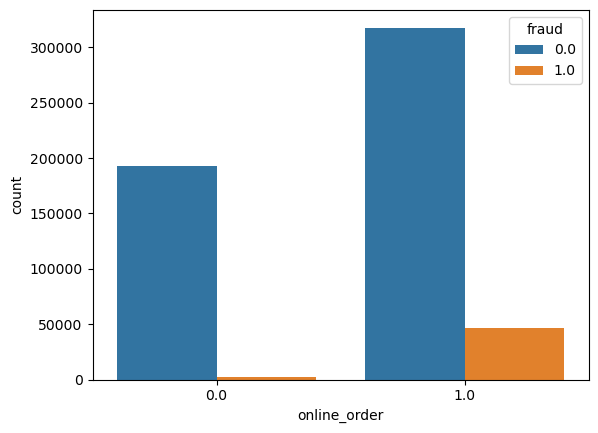

In [26]:
sns.countplot(data = train, x ='online_order', hue='fraud')

<AxesSubplot:xlabel='used_pin_number', ylabel='count'>

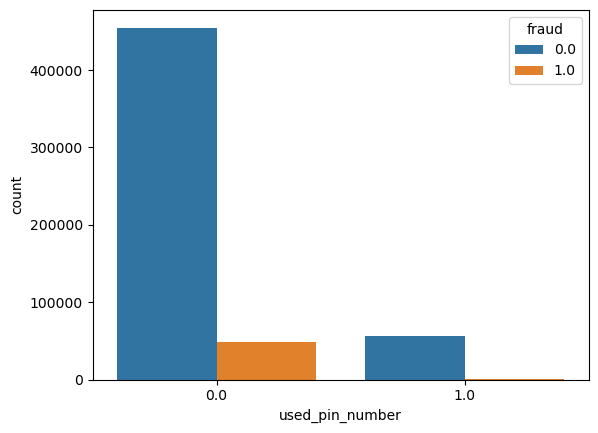

In [27]:
sns.countplot(data = train, x ='used_pin_number', hue='fraud')

<AxesSubplot:xlabel='used_chip', ylabel='count'>

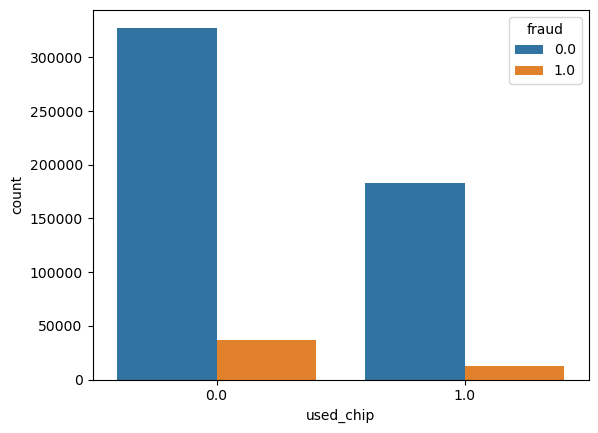

In [28]:
sns.countplot(data = train, x ='used_chip', hue='fraud')

<AxesSubplot:xlabel='repeat_retailer', ylabel='count'>

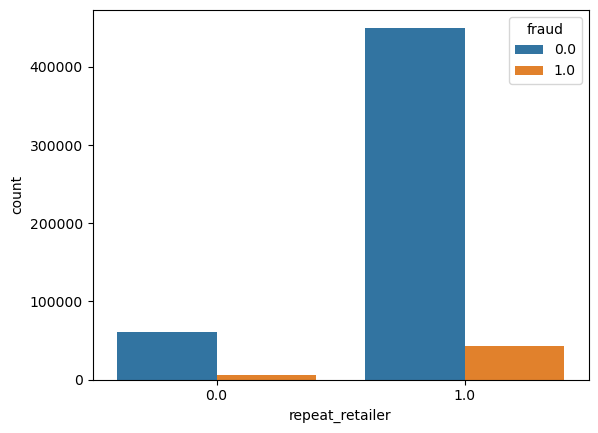

In [29]:
sns.countplot(data = train, x ='repeat_retailer', hue='fraud')

<AxesSubplot:xlabel='used_chip', ylabel='used_pin_number'>

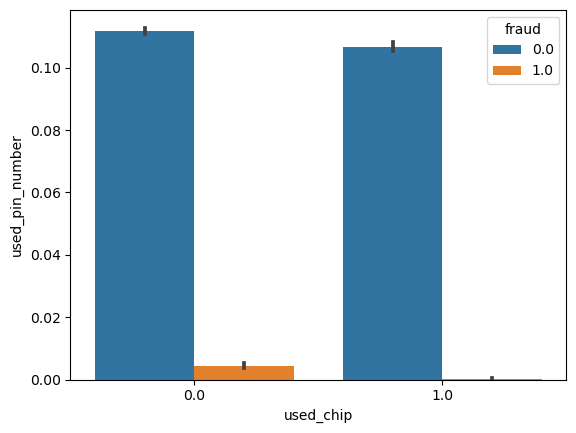

In [33]:
sns.barplot(data=train, x='used_chip', y='used_pin_number', hue='fraud')

<AxesSubplot:xlabel='online_order', ylabel='repeat_retailer'>

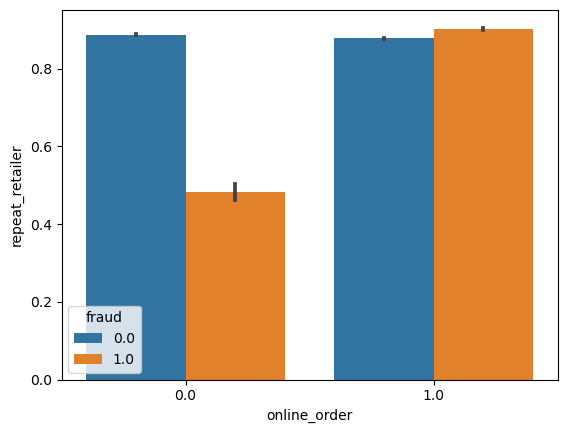

In [36]:
sns.barplot(data=train, x='online_order', y='repeat_retailer', hue='fraud')

<AxesSubplot:xlabel='distance_from_home', ylabel='distance_from_last_transaction'>

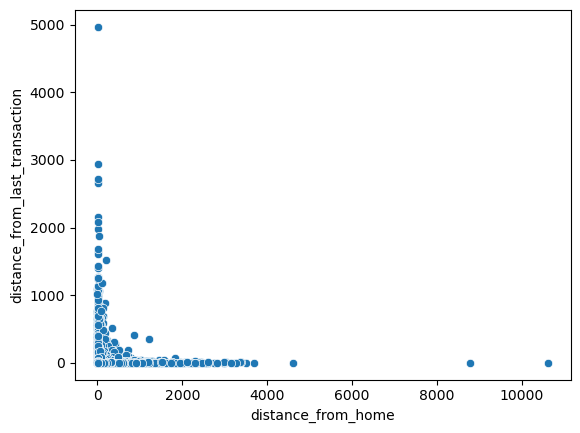

In [38]:
sns.scatterplot(data=train, x='distance_from_home', y='distance_from_last_transaction')

In [44]:
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale, return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns them scaled.
    If return_scalar is True, the scaler object will be returned as well
    '''
    # make copies of the original data so no leakage
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    # variable 
    mm_scaler = MinMaxScaler()
    # fit it to scaler
    mm_scaler.fit(train[columns_to_scale])
    # scaling train, validate, test, and columns
    train_scaled[columns_to_scale] = pd.DataFrame(mm_scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(mm_scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(mm_scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return mm_scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled
    



In [56]:
columns_to_scale = ['distance_from_home', 'distance_from_last_transaction', 
                    'ratio_to_median_purchase_price']
train_scaled, validate_scaled, test_scaled,= scale_data(train, 
                                             validate, test, columns_to_scale) 

In [57]:
train_scaled.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
398244,0.006788,0.000092,0.022040,1.0,0.0,0.0,0.0,0.0
773860,0.000306,0.002428,0.004272,1.0,0.0,0.0,1.0,0.0
145978,0.000052,0.000035,0.003171,0.0,0.0,0.0,1.0,0.0
900180,0.001873,0.000150,0.001642,1.0,0.0,0.0,1.0,0.0
309842,0.002188,0.000006,0.002340,1.0,0.0,0.0,0.0,0.0


In [60]:
#train_scaled = X_train_scaled, y_train_scaled
# X_validate_scaled, y_valitate_scaled = validate_scaled
# X_test, y_test = test_scaled

In [51]:
# code to generate baseline 
df['baseline'] = df['fraud'].value_counts().idxmax()
# clean f string
print(f"Baseline: {(df['fraud'] == df['baseline']).mean()*100:.2f}%")

Baseline: 91.26%


In [61]:
rf_train_scores = []
rf_validate_scores = []
for i in range(1,20):
    loop_forest = RandomForestClassifier(max_depth=i, random_state=42, max_samples=0.5)
    loop_forest.fit(X_train, y_train)
    rf_train_scores.append(loop_forest.score(X_train, y_train))
    rf_validate_scores.append(loop_forest.score(X_validate, y_validate))
rf_scores = {'train':rf_train_scores,'validate':rf_validate_scores}
rf_scores = pd.DataFrame(rf_scores)
rf_scores

,train,validate
0,0.912666,0.912050
1,0.916500,0.915800
2,0.973009,0.973383
3,0.991623,0.991712
4,0.999504,0.999463
5,0.999979,0.999946
6,0.999995,0.999962
7,0.999995,0.999962
8,0.999998,0.999967
9,1.000000,0.999975


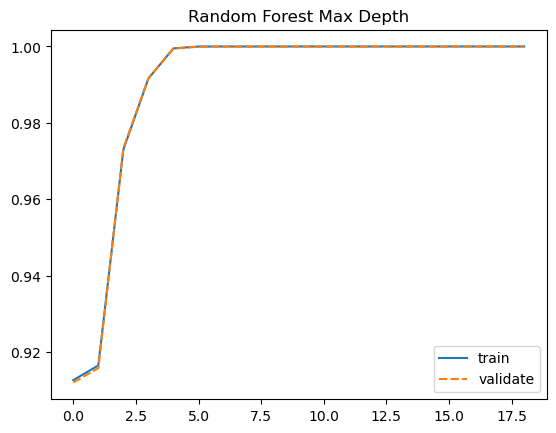

In [62]:
sns.lineplot(data = rf_scores)
plt.title("Random Forest Max Depth")
plt.show()

In [63]:
# random forest algorithm 
rf = RandomForestClassifier(max_depth=5, random_state=42,
                            max_samples=0.5)
#fit it 
rf.fit(X_train, y_train)
# clean f string
print('Random Forest Model')
print(f"Accuracy of Random Forest on train data: {rf.score(X_train, y_train)*100:.2f}%") 
print(f"Accuracy of Random Forest on validate: {rf.score(X_validate, y_validate)*100:.2f}%")

Random Forest Model
Accuracy of Random Forest on train data: 99.95%
Accuracy of Random Forest on validate: 99.95%


In [64]:
solver_list=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [65]:
lr_train_scores = []
lr_validate_scores = []
for i in solver_list:
    logit_loop = LogisticRegression(C=.1, random_state=42, 
                           intercept_scaling=1, solver=i)    
    logit_loop.fit(X_train, y_train)
    lr_train_scores.append(logit_loop.score(X_train, y_train))
    lr_validate_scores.append(logit_loop.score(X_validate, y_validate))
lr_scores = {'train':lr_train_scores,'validate':lr_validate_scores,'solver':solver_list}
lr_scores = pd.DataFrame(lr_scores)
lr_scores

,train,validate,solver
0,0.957298,0.956925,newton-cg
1,0.955879,0.955379,lbfgs
2,0.956882,0.956529,liblinear
3,0.912666,0.912050,sag
4,0.912666,0.912050,saga


In [ ]:
plt.plot(lr_scores['solver'],lr_scores["train"],label='train_scores')
plt.plot(lr_scores['solver'],lr_scores["validate"],label='validate_scores')
plt.legend()
plt.title("Logistic Regression Solvers")
plt.show()

In [ ]:
# Logistic Regression algorithm
logit = LogisticRegression(C=.1, random_state=42, 
                           intercept_scaling=1, solver='newton-cg')

#fit the model
logit.fit(X_train, y_train)
#clean f string
print('Logistic Regression Model')
print(f"Accuracy of Logistic Regression on train: {logit.score(X_train, y_train)*100:.2f}%") 
print(f"Accuracy of Logistic Regression on validate: {logit.score(X_validate, y_validate)*100:.2f}%")

In [ ]:
knn_train_scores = []
knn_validate_scores = []
for i in range(1,11):
    knn_loop = KNeighborsClassifier(n_neighbors=i)
    knn_loop.fit(X_train, y_train)
    knn_train_scores.append(knn_loop.score(X_train, y_train))
    knn_validate_scores.append(knn_loop.score(X_validate, y_validate))
knn_scores = {'train':knn_train_scores,'validate':knn_validate_scores}
knn_scores = pd.DataFrame(knn_scores)
print(knn_scores)

sns.lineplot(data=knn_scores)
plt.title("K-Nearest Neighbor")
plt.show()

In [ ]:
# K nearest neighbor algorithm

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)
knn.score(X_validate, y_validate)
# clean f string
print('KNN Model')
print(f"Accuracy of KNN on train: {knn.score(X_train, y_train)*100:.2f}%") 
print(f"Accuracy of KNN on validate: {knn.score(X_validate, y_validate)*100:.2f}%")

In [ ]:
clf_train_scores = []
clf_validate_scores = []
for i in range(1,11):
    clf_loop = DecisionTreeClassifier(max_depth=i)
    clf_loop.fit(X_train, y_train)
    clf_train_scores.append(clf_loop.score(X_train, y_train))
    clf_validate_scores.append(clf_loop.score(X_validate, y_validate))
clf_scores = {'train':clf_train_scores,'validate':clf_validate_scores}
clf_scores = pd.DataFrame(clf_scores)
print(clf_scores)

sns.lineplot(data=clf_scores)
plt.title("Decision Tree")
plt.show()

In [ ]:
# Decision Tree neighbor algorithm

clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)
clf.score(X_validate, y_validate)
# clean f string
print('KNN Model')
print(f"Accuracy of KNN on train: {clf.score(X_train, y_train)*100:.2f}%") 
print(f"Accuracy of KNN on validate: {clf.score(X_validate, y_validate)*100:.2f}%") 

In [ ]:
# best algorithm 
test_score = rf.score(X_test, y_test)

# clean f string
print('Random Forest Model')
print(f'Accuracy on Test {test_score*100:.2f}%')